# FE 595 Financial Technology - Final project

## Text Analysis of SEC Filings

**Contributors:** Diyan Rahaman, Jyotsna Ramaswamy

In this project we try to study the effect if any of financial reports filed by companies to the Securities and Exchange Commission (SEC), on the consequent returns for that year. We studied the Annual 10-K earnings reports for 500 of the companies that make up the S&P 500 using filings downloadedfrom the SEC's Electronic Data Gathering, Analysis and Retrieval (EDGAR) website [2] from 2008 to 2018. We analyzed the sentiment expressed in the Risk Section (Item 1A.) and tried to correlate it with the quarterly returns observed in the year the report is filed.

## Background

The initial hypothesis that the information contained in financial reports required by the SEC for publicly traded firms in the United States provided can be used to predict subsequent price movements was made in a paper called Lazy Prices (NBER Working Paper No. 25084) by Lauren Cohen, Christopher Malloy, and Quoc Nguyen [1]. In this paper, they study the language and construction of all financial reports required by the SEC for publicly traded firms in the United States over the two decades beginning in 1995. They construct portfolios of firms that had few textual changes in quarter-to-quarter reports and firms that had many changes, and find that portfolios that were long "non-changers" and short "changers" earned a statistically significant value-weighted abnormal return of between 34 and 58 basis points per month—between 4 and 7 percent per year—over the following year[3].

## Approach

In our project we approached this task in the following way:

1. Get a list of companies that comprises the S&P 500 Index from the Wiki website [4], using code in `wiki.py` file to webscrape the table containing the components and get a list containing the company name, ticker symbol and CIK (Central Index Key) assigned to the company by the SEC. This list is saved off to a file called `sp500.csv` to be used in later processing.

2. For each CIK in the list of 500 companies that comprises the S&P 500 we pull the Risk Section (Item 1A.) from 10-K filings which have been downloaded previously from 10-K filings by Bill McDonald [5]. The text filings are processed using code in `sec.py` to read the file, clean it of unicode characters and extract the Risk Section. The period studied is between 2008 and 2018 and the resulting sentiments for each company for each filing year is saved off to a file called `sentiments.csv` for further processing.

3. For each company and year for which a risk sentiment has been determined, we use the code in `yahoofin.py` to get the price history of the company using their ticker symbol for a given year and calculating the quarterly returns that would result at the end of each quarter. All this data, along with the original sentiment data is now saved to a file called `results.csv` which will be analyzed further.

4. Finally we download the price history for the SPY ETF fund as a benchmark for the S&P 500 Index as a whole, so we can compare the quarterly returns of various companies with positive/negative sentiments with that of the quarterly returns of the benchmark fund. The results of this data is saved to a file called `spy.csv` for later analysis.


## Analysis of Data

### 1. Load the results data and remove any rows with missing data

Load the results data from `results.csv` file into a pandas dataframe and remove any rows that have missing data (where sentiment is 0)

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

resdata = pd.read_csv(r".\Data\results.csv")
results = resdata[resdata.Sentiment != 0]
results.head()

,Name,Symbol,CIK,Year,Sentiment,Q1,Q2,Q3,Q4
0,Dollar Tree,DLTR,935703,2018,0.046410,-0.126875,-0.217959,-0.249701,-0.192842
1,Dollar Tree,DLTR,935703,2017,0.046967,0.013041,-0.097224,0.120981,0.385539
2,Dollar Tree,DLTR,935703,2016,0.049301,0.046314,0.195787,0.001523,-0.020683
3,Dollar Tree,DLTR,935703,2015,0.032298,0.153518,0.122814,-0.052452,0.103341
4,Dollar Tree,DLTR,935703,2014,0.038498,-0.074823,-0.034397,-0.005851,0.253546


### 2. Exploratory Analysis

See if any linear relationship exists between the sentiments and the quarterly returns.

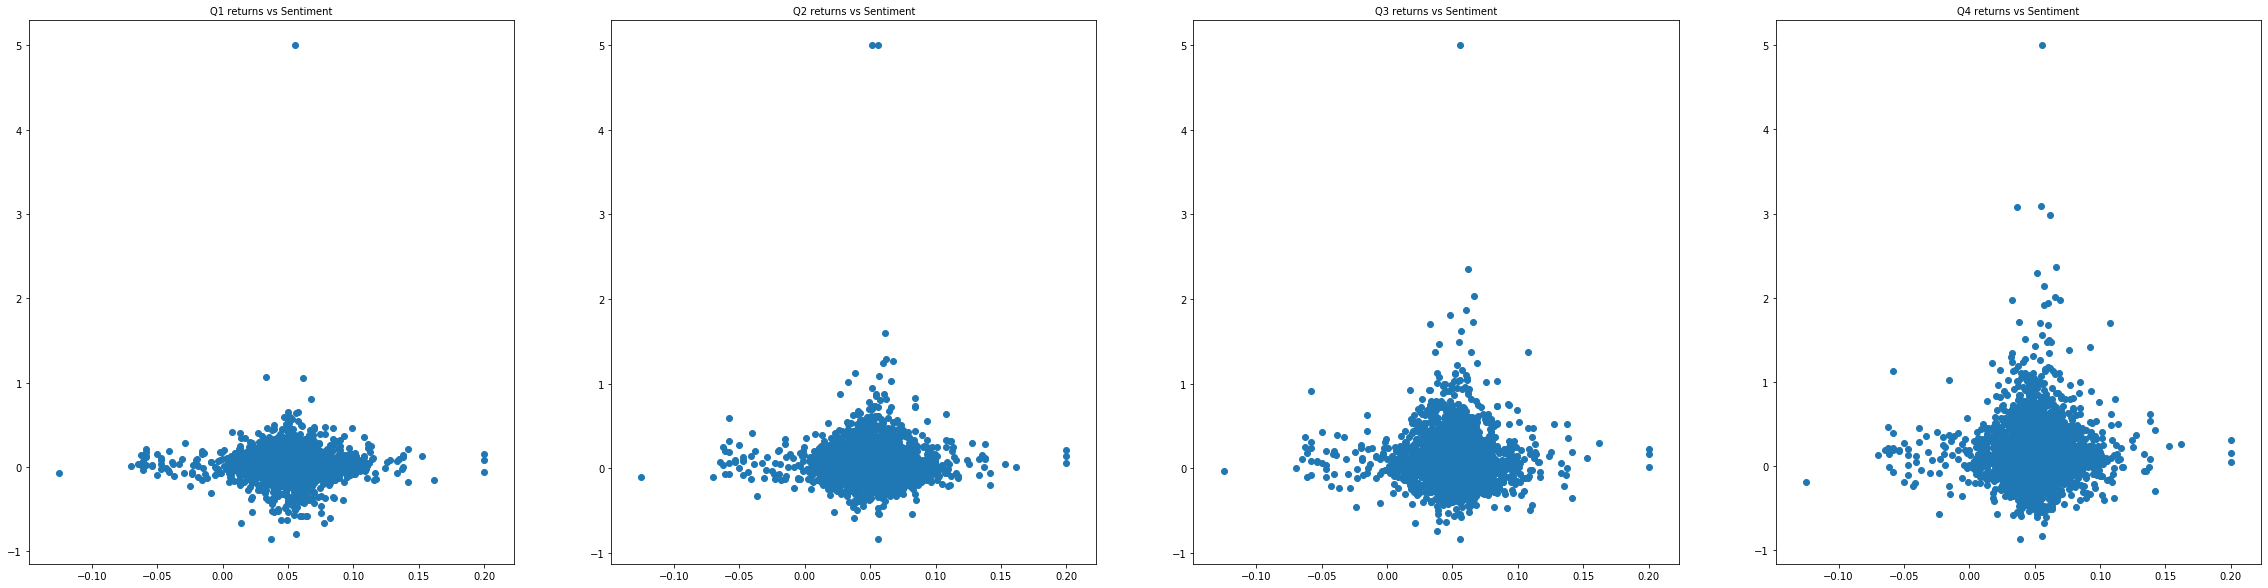

In [8]:
fig = plt.figure(figsize=(40, 10))

ax1 = plt.subplot2grid((1, 4), (0, 0))
ax1.scatter(results["Sentiment"], results["Q1"])
ax1.set_title('Q1 returns vs Sentiment', fontsize=10)

ax2 = plt.subplot2grid((1, 4), (0, 1))
ax2.scatter(results["Sentiment"], results["Q2"])
ax2.set_title('Q2 returns vs Sentiment', fontsize=10)

ax3 = plt.subplot2grid((1, 4), (0, 2))
ax3.scatter(results["Sentiment"], results["Q3"])
ax3.set_title('Q3 returns vs Sentiment', fontsize=10)

ax4 = plt.subplot2grid((1, 4), (0, 3))
ax4.scatter(results["Sentiment"], results["Q4"])
ax4.set_title('Q4 returns vs Sentiment', fontsize=10)

plt.show()

### 3. Companies with best and worst sentiments

Here we anlyze only the 10 best and 10 worst companies in terms of their sentiment and see how their avearge returns are for each quarter.

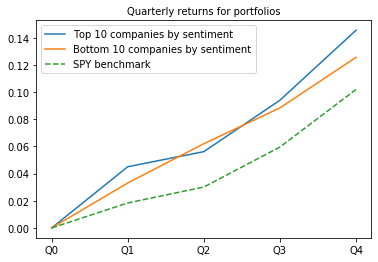

In [13]:
top10res = results.groupby("Year").apply(lambda x: x.nlargest(10, "Sentiment"))[['Q1','Q2','Q3','Q4']]
top10ret = top10res.groupby('Year').mean()
top10ret.insert(0,"Q0", 0.0)

bot10res = results.groupby("Year").apply(lambda x: x.nsmallest(10, "Sentiment"))[['Q1','Q2','Q3','Q4']]
bot10ret = bot10res.groupby('Year').mean()
bot10ret.insert(0,"Q0", 0.0)

spydata = pd.read_csv(r".\Data\spy.csv")
spyret = spydata.groupby("Year")[['Q1','Q2','Q3','Q4']].mean()
spyret.insert(0,"Q0", 0.0)

plt.plot(top10ret.mean(), label='Top 10 companies by sentiment')
plt.plot(bot10ret.mean(), label='Bottom 10 companies by sentiment')
plt.plot(spyret.mean(), '--', label='SPY benchmark')
plt.title('Quarterly returns for portfolios', fontsize=10)
plt.legend()

plt.show()

## Conclusion



## Bibliography

[1] **Cohen, Lauren, Malloy, Christopher, Nguyen, Quoc**, "Lazy Prices", _Working Paper 25084, NATIONAL BUREAU OF ECONOMIC RESEARCH_, (2018).

[2] **https://www.sec.gov/edgar/**

[3] **Are Investors Inattentive to SEC-Mandated Corporate Reports?**, _Digest, NATIONAL BUREAU OF ECONOMIC RESEARCH_, (November 2018).

[4] **https://en.wikipedia.org/wiki/List_of_S%26P_500_companies**

[5] **https://sraf.nd.edu/data/stage-one-10-x-parse-data/**